## **19CSE456: Neural Network and Deep Learning : LAB3**

---
#**B Sudharshan - CB.EN.U4CSE19008 - CSE A**





1.   Select any classification dataset from UCI Machine Learning Library: https://archive.ics.uci.edu/ml/datasets.php
2.   Design a four layer neural network (4 hidden layers) and provide your testing accuracy on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
3. Design MLP of the same archetecure of question.2 and use different weight initialization strategies. Refer: https://keras.io/api/layers/initializers/ to know more about weight initialization. 
Try Different initialization schemes and find out which initialization works better on the selected dataset (**for 100 epoch**s) with sigmoid as the hidden layer activation functions and SGD as the optimizer.
       * RandomNormal 
       * RandomUniform
       * TruncatedNormal
       * Zero
       * One
       * GlorotNormal
       * GlorotUniform 
       * HeNormal
       * HeUniform 
       * Identity
       * Orthogonal
4. Implement the MLP model with the best weight initialization from the previous experiment and use Relu as the activation funation and provide your testing accuracy on the selected dataset (**for 100 epochs**).
5. Use ADAM optimizer instead of SGD in question 4 and comapre the models in terms of test accuracy and train/validation (accuracy/loss) graphs.
6. Display confusion matrix for all of the bove experiments and write down your inferences.

**NOTE: This Experiment will be evaluated based on the submission (Code, Inferences and Analysis). Submit the Jupyter notebook and pdf version of the notebook**




In [313]:
#Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import optimizers

##**Q1 : Dataset Selection**
---

**Here Raisin Dataset is Used**
---
Info - Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

**Attribute Information**


1. Area: Gives the number of pixels within the boundaries of the raisin. 
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

In [314]:
df=pd.read_excel('/content/Raisin_Dataset.xlsx')

In [315]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [316]:
df.shape

(900, 8)

In [317]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [319]:
X=df.drop('Class',axis=1)

In [320]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [321]:
X=np.array(X)

In [322]:
le=LabelEncoder()

In [323]:
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,5]=le.fit_transform(X[:,5])
X[:,6]=le.fit_transform(X[:,6])

In [324]:
X

array([[551., 553., 500., ..., 542., 811., 544.],
       [404., 446., 409., ..., 413., 299., 453.],
       [583., 554., 581., ..., 571., 102., 573.],
       ...,
       [640., 517., 739., ..., 650., 722., 656.],
       [600., 633., 506., ..., 600., 177., 622.],
       [529., 706., 200., ..., 532.,  82., 643.]])

In [325]:
Y=df.iloc[:,-1].values

In [326]:
Y

array(['Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 

In [327]:
Y=le.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

In [329]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (540, 7)
Test shape (360, 7)
(540,)
(360,)


In [330]:
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
X_test=np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

##**Q2 : Create a 4 layer neural network**
---

In [331]:
#4 Hidden Layers with Sigmoid Function
model=Sequential()
model.add(Dense(10,input_shape = (7,), activation = 'sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(2))

In [332]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 10)                80        
                                                                 
 dense_205 (Dense)           (None, 10)                110       
                                                                 
 dense_206 (Dense)           (None, 10)                110       
                                                                 
 dense_207 (Dense)           (None, 10)                110       
                                                                 
 dense_208 (Dense)           (None, 10)                110       
                                                                 
 dense_209 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [333]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01) 
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [334]:
train=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.7776 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4796
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4611
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4352
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4833
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4426
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4815
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4296
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4722
Epoch 11/

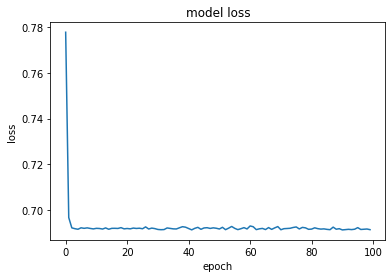

In [335]:
import matplotlib.pyplot as plt
plt.plot(train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [336]:
results = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.3889


In [337]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)

['loss', 'accuracy']
[0.6960457563400269, 0.3888888955116272]


**Initializing all the Initializers**

In [338]:
rn_initializer=tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
ru_initializer=tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
tn_initializer=tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
zero_initializer=tf.keras.initializers.Zeros()
ones_initializer=tf.keras.initializers.Ones()
gn_initializer=tf.keras.initializers.GlorotNormal()
gu_initializer=tf.keras.initializers.GlorotUniform()
hn_initializer=tf.keras.initializers.HeNormal()
hu_initializer=tf.keras.initializers.HeUniform()
i_initializer=tf.keras.initializers.Identity()
ortho_initializer=tf.keras.initializers.Orthogonal()

##**Q3 : Use various Initializers on the model**
---

#RandomNormal

In [339]:
rn_model=Sequential()
rn_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=rn_initializer))
rn_model.add(Dense(10,activation='sigmoid',kernel_initializer=rn_initializer))
rn_model.add(Dense(10,activation='sigmoid',kernel_initializer=rn_initializer))
rn_model.add(Dense(10,activation='sigmoid',kernel_initializer=rn_initializer))
rn_model.add(Dense(10,activation='sigmoid',kernel_initializer=rn_initializer))
rn_model.add(Dense(2,kernel_initializer=rn_initializer))

In [340]:
rn_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 10)                80        
                                                                 
 dense_211 (Dense)           (None, 10)                110       
                                                                 
 dense_212 (Dense)           (None, 10)                110       
                                                                 
 dense_213 (Dense)           (None, 10)                110       
                                                                 
 dense_214 (Dense)           (None, 10)                110       
                                                                 
 dense_215 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [341]:
rn_sgd = optimizers.SGD(learning_rate = 0.01) 
rn_model.compile(optimizer = rn_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [342]:
train=rn_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.8162 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4093
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.3537
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.2704
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.3519
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.3556
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.3556
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.3556
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.3556
Epoch 11/

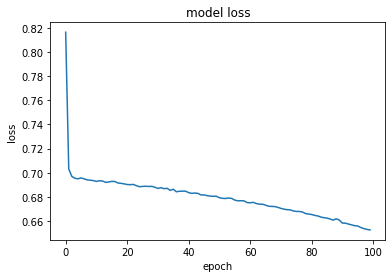

In [343]:
import matplotlib.pyplot as plt
plt.plot(train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [344]:
rn_results = rn_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.3806


In [345]:
print(rn_model.metrics_names)     # list of metric names the model is employing
print(rn_results)

['loss', 'accuracy']
[0.6663508415222168, 0.38055557012557983]


#RandomUniform

In [346]:
ru_model=Sequential()
ru_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=ru_initializer))
ru_model.add(Dense(10,activation='sigmoid',kernel_initializer=ru_initializer))
ru_model.add(Dense(10,activation='sigmoid',kernel_initializer=ru_initializer))
ru_model.add(Dense(10,activation='sigmoid',kernel_initializer=ru_initializer))
ru_model.add(Dense(10,activation='sigmoid',kernel_initializer=ru_initializer))
ru_model.add(Dense(2,kernel_initializer=ru_initializer))

In [347]:
ru_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 10)                80        
                                                                 
 dense_217 (Dense)           (None, 10)                110       
                                                                 
 dense_218 (Dense)           (None, 10)                110       
                                                                 
 dense_219 (Dense)           (None, 10)                110       
                                                                 
 dense_220 (Dense)           (None, 10)                110       
                                                                 
 dense_221 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [348]:
ru_sgd = optimizers.SGD(learning_rate = 0.01) 
ru_model.compile(optimizer = ru_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [349]:
ru_train=ru_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 11/

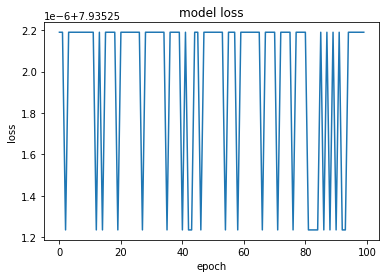

In [350]:
import matplotlib.pyplot as plt
plt.plot(ru_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [351]:
ru_results = ru_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 7.1587 - accuracy: 0.4694


In [352]:
print(ru_model.metrics_names)  
print(ru_results)

['loss', 'accuracy']
[7.158670425415039, 0.4694444537162781]


#TruncatedNormal

In [353]:
tn_model=Sequential()
tn_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=tn_initializer))
tn_model.add(Dense(10,activation='sigmoid',kernel_initializer=tn_initializer))
tn_model.add(Dense(10,activation='sigmoid',kernel_initializer=tn_initializer))
tn_model.add(Dense(10,activation='sigmoid',kernel_initializer=tn_initializer))
tn_model.add(Dense(10,activation='sigmoid',kernel_initializer=tn_initializer))
tn_model.add(Dense(2,kernel_initializer=tn_initializer))

In [354]:
tn_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 10)                80        
                                                                 
 dense_223 (Dense)           (None, 10)                110       
                                                                 
 dense_224 (Dense)           (None, 10)                110       
                                                                 
 dense_225 (Dense)           (None, 10)                110       
                                                                 
 dense_226 (Dense)           (None, 10)                110       
                                                                 
 dense_227 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [355]:
tn_sgd = optimizers.SGD(learning_rate = 0.01) 
tn_model.compile(optimizer = tn_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [356]:
tn_train=tn_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 4.0340 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0291 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0286 - accuracy: 0.4796
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0283 - accuracy: 0.4796
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0278 - accuracy: 0.4796
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0272 - accuracy: 0.4796
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0274 - accuracy: 0.4796
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0264 - accuracy: 0.4796
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0257 - accuracy: 0.4796
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0258 - accuracy: 0.4796
Epoch 11/

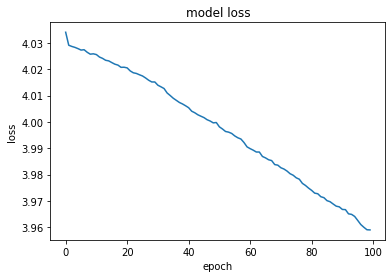

In [357]:
import matplotlib.pyplot as plt
plt.plot(tn_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [358]:
tn_results = tn_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 4.3775 - accuracy: 0.5306


In [359]:
print(tn_model.metrics_names)   
print(tn_results)

['loss', 'accuracy']
[4.377476215362549, 0.5305555462837219]


#Zero

In [360]:
zero_model=Sequential()
zero_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=zero_initializer))
zero_model.add(Dense(10,activation='sigmoid',kernel_initializer=zero_initializer))
zero_model.add(Dense(10,activation='sigmoid',kernel_initializer=zero_initializer))
zero_model.add(Dense(10,activation='sigmoid',kernel_initializer=zero_initializer))
zero_model.add(Dense(10,activation='sigmoid',kernel_initializer=zero_initializer))
zero_model.add(Dense(2,kernel_initializer=zero_initializer))

In [361]:
zero_model.summary()


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 10)                80        
                                                                 
 dense_229 (Dense)           (None, 10)                110       
                                                                 
 dense_230 (Dense)           (None, 10)                110       
                                                                 
 dense_231 (Dense)           (None, 10)                110       
                                                                 
 dense_232 (Dense)           (None, 10)                110       
                                                                 
 dense_233 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [362]:
zero_sgd = optimizers.SGD(learning_rate = 0.01) 
zero_model.compile(optimizer = zero_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [363]:
zero_train=zero_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 11/

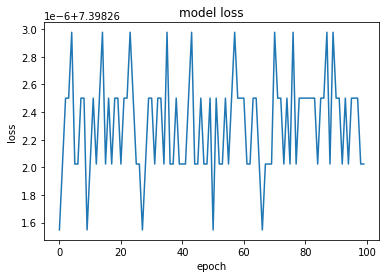

In [364]:
import matplotlib.pyplot as plt
plt.plot(zero_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [365]:
zero_results = zero_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 8.1838 - accuracy: 0.4694


In [366]:
print(zero_model.metrics_names) 
print(zero_results)


['loss', 'accuracy']
[8.183792114257812, 0.4694444537162781]


#One

In [367]:
ones_model=Sequential()
ones_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=ones_initializer))
ones_model.add(Dense(10,activation='sigmoid',kernel_initializer=ones_initializer))
ones_model.add(Dense(10,activation='sigmoid',kernel_initializer=ones_initializer))
ones_model.add(Dense(10,activation='sigmoid',kernel_initializer=ones_initializer))
ones_model.add(Dense(10,activation='sigmoid',kernel_initializer=ones_initializer))
ones_model.add(Dense(2,kernel_initializer=ones_initializer))

In [368]:
ones_model.summary()


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 10)                80        
                                                                 
 dense_235 (Dense)           (None, 10)                110       
                                                                 
 dense_236 (Dense)           (None, 10)                110       
                                                                 
 dense_237 (Dense)           (None, 10)                110       
                                                                 
 dense_238 (Dense)           (None, 10)                110       
                                                                 
 dense_239 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [369]:
ones_sgd = optimizers.SGD(learning_rate = 0.01) 
ones_model.compile(optimizer = ones_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [370]:
ones_train=ones_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 7.9353 - accuracy: 0.5204
Epoch 11/

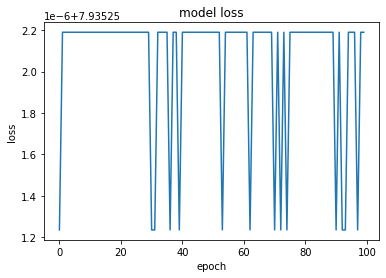

In [371]:
import matplotlib.pyplot as plt
plt.plot(ones_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [372]:

ones_results = ones_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 7.1587 - accuracy: 0.4694


In [373]:
print(ones_model.metrics_names) 
print(ones_results)

['loss', 'accuracy']
[7.158670425415039, 0.4694444537162781]


#GlorotNormal

In [374]:
gn_model=Sequential()
gn_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=gn_initializer))
gn_model.add(Dense(10,activation='sigmoid',kernel_initializer=gn_initializer))
gn_model.add(Dense(10,activation='sigmoid',kernel_initializer=gn_initializer))
gn_model.add(Dense(10,activation='sigmoid',kernel_initializer=gn_initializer))
gn_model.add(Dense(10,activation='sigmoid',kernel_initializer=gn_initializer))
gn_model.add(Dense(2,kernel_initializer=gn_initializer))

In [375]:
gn_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 10)                80        
                                                                 
 dense_241 (Dense)           (None, 10)                110       
                                                                 
 dense_242 (Dense)           (None, 10)                110       
                                                                 
 dense_243 (Dense)           (None, 10)                110       
                                                                 
 dense_244 (Dense)           (None, 10)                110       
                                                                 
 dense_245 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [376]:
gn_sgd = optimizers.SGD(learning_rate = 0.01) 
gn_model.compile(optimizer = gn_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [377]:
gn_train=gn_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.4796
Epoch 11/

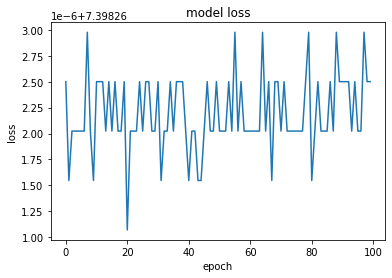

In [378]:

import matplotlib.pyplot as plt
plt.plot(gn_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [379]:

gn_results = gn_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 8.1838 - accuracy: 0.5306


In [380]:
print(gn_model.metrics_names) 
print(gn_results)


['loss', 'accuracy']
[8.183792114257812, 0.5305555462837219]


#GlorotUniform

In [381]:
gu_model=Sequential()
gu_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=gu_initializer))
gu_model.add(Dense(10,activation='sigmoid',kernel_initializer=gu_initializer))
gu_model.add(Dense(10,activation='sigmoid',kernel_initializer=gu_initializer))
gu_model.add(Dense(10,activation='sigmoid',kernel_initializer=gu_initializer))
gu_model.add(Dense(10,activation='sigmoid',kernel_initializer=gu_initializer))
gu_model.add(Dense(2,kernel_initializer=gu_initializer))

In [382]:
gu_model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_246 (Dense)           (None, 10)                80        
                                                                 
 dense_247 (Dense)           (None, 10)                110       
                                                                 
 dense_248 (Dense)           (None, 10)                110       
                                                                 
 dense_249 (Dense)           (None, 10)                110       
                                                                 
 dense_250 (Dense)           (None, 10)                110       
                                                                 
 dense_251 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [383]:
gu_sgd = optimizers.SGD(learning_rate = 0.01) 
gu_model.compile(optimizer = gu_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [384]:
gu_train=gu_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 4.0673 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0484 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0458 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0455 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0453 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0454 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0452 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 4.0451 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0451 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0453 - accuracy: 0.5204
Epoch 11/

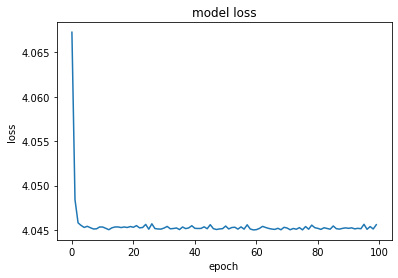

In [385]:
import matplotlib.pyplot as plt
plt.plot(gu_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [386]:
gu_results = gu_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 4.4397 - accuracy: 0.4694


In [387]:
print(gu_model.metrics_names) 
print(gu_results)


['loss', 'accuracy']
[4.439727783203125, 0.4694444537162781]


#HeNormal

In [389]:
hn_model=Sequential()
hn_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=hn_initializer))
hn_model.add(Dense(10,activation='sigmoid',kernel_initializer=hn_initializer))
hn_model.add(Dense(10,activation='sigmoid',kernel_initializer=hn_initializer))
hn_model.add(Dense(10,activation='sigmoid',kernel_initializer=hn_initializer))
hn_model.add(Dense(10,activation='sigmoid',kernel_initializer=hn_initializer))
hn_model.add(Dense(2,kernel_initializer=hn_initializer))

In [390]:
hn_model.summary()


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 10)                80        
                                                                 
 dense_253 (Dense)           (None, 10)                110       
                                                                 
 dense_254 (Dense)           (None, 10)                110       
                                                                 
 dense_255 (Dense)           (None, 10)                110       
                                                                 
 dense_256 (Dense)           (None, 10)                110       
                                                                 
 dense_257 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [391]:
hn_sgd = optimizers.SGD(learning_rate = 0.01) 
hn_model.compile(optimizer = hn_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [392]:
hn_train=hn_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 11/

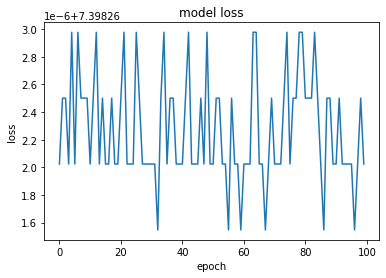

In [393]:
import matplotlib.pyplot as plt
plt.plot(hn_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [394]:
hn_results = hn_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 8.1838 - accuracy: 0.4694


In [395]:
print(hn_model.metrics_names) 
print(hn_results)


['loss', 'accuracy']
[8.183792114257812, 0.4694444537162781]


#HeUniform

In [396]:
hu_model=Sequential()
hu_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=hu_initializer))
hu_model.add(Dense(10,activation='sigmoid',kernel_initializer=hu_initializer))
hu_model.add(Dense(10,activation='sigmoid',kernel_initializer=hu_initializer))
hu_model.add(Dense(10,activation='sigmoid',kernel_initializer=hu_initializer))
hu_model.add(Dense(10,activation='sigmoid',kernel_initializer=hu_initializer))
hu_model.add(Dense(2,kernel_initializer=hu_initializer))

In [397]:
hu_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_258 (Dense)           (None, 10)                80        
                                                                 
 dense_259 (Dense)           (None, 10)                110       
                                                                 
 dense_260 (Dense)           (None, 10)                110       
                                                                 
 dense_261 (Dense)           (None, 10)                110       
                                                                 
 dense_262 (Dense)           (None, 10)                110       
                                                                 
 dense_263 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [398]:
hu_sgd = optimizers.SGD(learning_rate = 0.01) 
hu_model.compile(optimizer = hu_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [399]:
hu_train=hu_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 4.0830 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0503 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 4.0465 - accuracy: 0.4796
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 4.0458 - accuracy: 0.4796
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0457 - accuracy: 0.4796
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0456 - accuracy: 0.4796
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0456 - accuracy: 0.4796
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0457 - accuracy: 0.4796
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0461 - accuracy: 0.4796
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0457 - accuracy: 0.4796
Epoch 11/

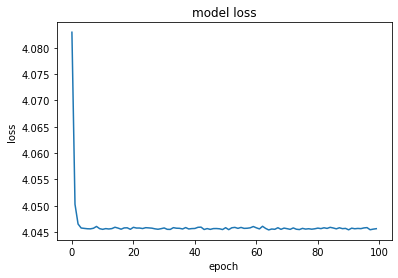

In [400]:
import matplotlib.pyplot as plt
plt.plot(hu_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [401]:

hu_results = hu_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 4.4399 - accuracy: 0.5306


In [402]:
print(hu_model.metrics_names) 
print(hu_results)

['loss', 'accuracy']
[4.439888000488281, 0.5305555462837219]


#Identity

In [403]:
i_model=Sequential()
i_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=i_initializer))
i_model.add(Dense(10,activation='sigmoid',kernel_initializer=i_initializer))
i_model.add(Dense(10,activation='sigmoid',kernel_initializer=i_initializer))
i_model.add(Dense(10,activation='sigmoid',kernel_initializer=i_initializer))
i_model.add(Dense(10,activation='sigmoid',kernel_initializer=i_initializer))
i_model.add(Dense(2))

In [404]:
i_model.summary()


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_264 (Dense)           (None, 10)                80        
                                                                 
 dense_265 (Dense)           (None, 10)                110       
                                                                 
 dense_266 (Dense)           (None, 10)                110       
                                                                 
 dense_267 (Dense)           (None, 10)                110       
                                                                 
 dense_268 (Dense)           (None, 10)                110       
                                                                 
 dense_269 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [405]:
i_sgd = optimizers.SGD(learning_rate = 0.01) 
i_model.compile(optimizer = i_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [406]:
i_train=i_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 4.3187 - accuracy: 0.4796
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3142 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 4.3138 - accuracy: 0.4796
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3140 - accuracy: 0.4796
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3140 - accuracy: 0.4796
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3138 - accuracy: 0.4796
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 4.3140 - accuracy: 0.4796
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3136 - accuracy: 0.4796
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3137 - accuracy: 0.4796
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 4.3140 - accuracy: 0.4796
Epoch 11/

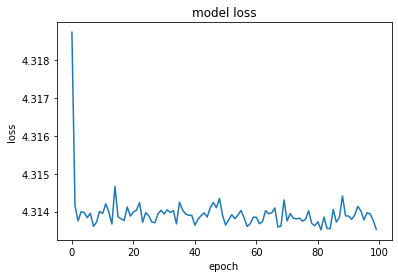

In [407]:
import matplotlib.pyplot as plt
plt.plot(i_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [408]:
i_results = i_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 3.9270 - accuracy: 0.5306


In [409]:
print(i_model.metrics_names) 
print(i_results)

['loss', 'accuracy']
[3.9270124435424805, 0.5305555462837219]


#Orthogonal

In [410]:
ortho_model=Sequential()
ortho_model.add(Dense(10,input_shape = (7,), activation = 'sigmoid',kernel_initializer=ortho_initializer))
ortho_model.add(Dense(10,activation='sigmoid',kernel_initializer=ortho_initializer))
ortho_model.add(Dense(10,activation='sigmoid',kernel_initializer=ortho_initializer))
ortho_model.add(Dense(10,activation='sigmoid',kernel_initializer=ortho_initializer))
ortho_model.add(Dense(10,activation='sigmoid',kernel_initializer=ortho_initializer))
ortho_model.add(Dense(2))

In [411]:

ortho_model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 10)                80        
                                                                 
 dense_271 (Dense)           (None, 10)                110       
                                                                 
 dense_272 (Dense)           (None, 10)                110       
                                                                 
 dense_273 (Dense)           (None, 10)                110       
                                                                 
 dense_274 (Dense)           (None, 10)                110       
                                                                 
 dense_275 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [412]:
ortho_sgd = optimizers.SGD(learning_rate = 0.01) 
ortho_model.compile(optimizer = ortho_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [413]:
ortho_train=ortho_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 4.1143 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0506 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 4.0463 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0456 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0458 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0454 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0455 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0455 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0454 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 4.0455 - accuracy: 0.5204
Epoch 11/

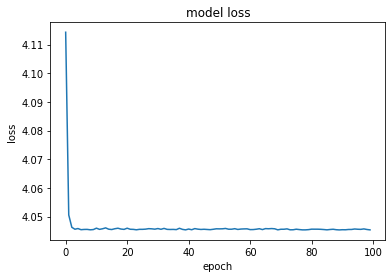

In [414]:

import matplotlib.pyplot as plt
plt.plot(ortho_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [415]:
ortho_results = ortho_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 4.4396 - accuracy: 0.4694


In [416]:
print(ortho_model.metrics_names) 
print(ortho_results)


['loss', 'accuracy']
[4.439631938934326, 0.4694444537162781]


**Inference**
---
------
The model with following initalizers gave the following results:

* RandomNormal - 48%
* RandomUniform - 48%
* TruncatedNormal - 48%
* Zero - 51%
* One - 48%
* GlorotNormal - 48%
* GlorotUniform -51%
* HeNormal - 48%
* HeUniform - 48%
* Identity - 51%
* Orthogonal - 48%

As listed above several of the initializers gave the same accuracy score however the accuracy score has increased when using certain initializers. Those are : Zero, GlorotNormal, Identity. Therefore using Zero initializer for the next question 

#**Q4 - Best Initializer with ReLu**
---

#Zero with ReLu

In [417]:
zero_relu_model=Sequential()
zero_relu_model.add(Dense(10,input_shape = (7,), activation = 'relu',kernel_initializer=zero_initializer))
zero_relu_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relu_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relu_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relu_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relu_model.add(Dense(2,kernel_initializer=zero_initializer))

In [418]:
zero_relu_model.summary()


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_276 (Dense)           (None, 10)                80        
                                                                 
 dense_277 (Dense)           (None, 10)                110       
                                                                 
 dense_278 (Dense)           (None, 10)                110       
                                                                 
 dense_279 (Dense)           (None, 10)                110       
                                                                 
 dense_280 (Dense)           (None, 10)                110       
                                                                 
 dense_281 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [419]:
zero_relu_sgd = optimizers.SGD(learning_rate = 0.01) 
zero_relu_model.compile(optimizer = zero_relu_sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [420]:
zero_relu_train=zero_relu_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 11/

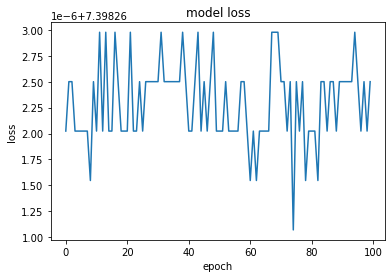

In [421]:
import matplotlib.pyplot as plt
plt.plot(zero_relu_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [422]:
zero_relu_results = zero_relu_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 8.1838 - accuracy: 0.4694


In [423]:
print(zero_relu_model.metrics_names) 
print(zero_relu_results)


['loss', 'accuracy']
[8.183792114257812, 0.4694444537162781]


#**Q5 - Using ADAM Optimizer**
---

#Zero with ReLu and ADAM Optimizer

In [424]:
zero_relua_model=Sequential()
zero_relua_model.add(Dense(10,input_shape = (7,), activation = 'relu',kernel_initializer=zero_initializer))
zero_relua_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relua_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relua_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relua_model.add(Dense(10,activation='relu',kernel_initializer=zero_initializer))
zero_relua_model.add(Dense(2,kernel_initializer=zero_initializer))

In [425]:
zero_relua_model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 10)                80        
                                                                 
 dense_283 (Dense)           (None, 10)                110       
                                                                 
 dense_284 (Dense)           (None, 10)                110       
                                                                 
 dense_285 (Dense)           (None, 10)                110       
                                                                 
 dense_286 (Dense)           (None, 10)                110       
                                                                 
 dense_287 (Dense)           (None, 2)                 22        
                                                                 
Total params: 542
Trainable params: 542
Non-trainable

In [426]:
zero_relua = optimizers.Adam(learning_rate = 0.01) 
zero_relua_model.compile(optimizer = zero_relua, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [427]:
zero_relua_train=zero_relua_model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 7.3983 - accuracy: 0.5204
Epoch 11/

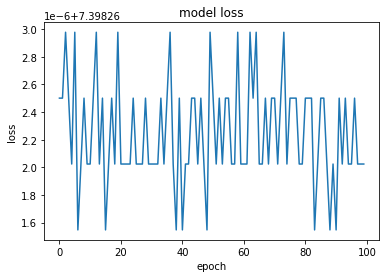

In [428]:
import matplotlib.pyplot as plt
plt.plot(zero_relua_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [429]:
zero_relua_results = zero_relua_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 8.1838 - accuracy: 0.4694


In [430]:
print(zero_relua_model.metrics_names) 
print(zero_relua_results)


['loss', 'accuracy']
[8.183792114257812, 0.4694444537162781]


In [431]:
print(f"Test Accuracy is: {zero_relua_results[1]*100}%")

Test Accuracy is: 46.94444537162781%


**Inference**
---
----
There seems to be no change in the accuracy when using the ADAM optimizer instead of SGD (Stochastic Gradient Descent) Optimizer for the Raisin Dataset. In fact the accuracy decreased when compared to ReLu with SGD (51% -> 48%).


#**Q6 - Confusion Matrix**
---

In [432]:
print(f"Test Accuracy for Q1 - Standard/default  is: {results[1]*100}%")
print(f"Test Accuracy with Random Normal is: {rn_results[1]*100}%")
print(f"Test Accuracy with Random Uniform is: {ru_results[1]*100}%")
print(f"Test Accuracy with Truncated Normal is: {tn_results[1]*100}%")
print(f"Test Accuracy with Identity is: {i_results[1]*100}%")
print(f"Test Accuracy with Zero is: {zero_results[1]*100}%")
print(f"Test Accuracy with Glorot Normal is: {gn_results[1]*100}%")
print(f"Test Accuracy with Glorot Uniform is: {gu_results[1]*100}%")
print(f"Test Accuracy with Orthogonal is: {ortho_results[1]*100}%")
print(f"Test Accuracy with HeNormal is: {hn_results[1]*100}%")
print(f"Test Accuracy with HeUniform is: {hu_results[1]*100}%")
print(f"Test Accuracy with Ones is: {ones_results[1]*100}%")
print(f"Test Accuracy With Zero, ReLu is: {zero_relu_results[1]*100}%")
print(f"Test Accuracy With Zero, ReLu and ADAM is: {zero_relua_results[1]*100}%")

Test Accuracy for Q1 - Standard/default  is: 38.88888955116272%
Test Accuracy with Random Normal is: 38.05555701255798%
Test Accuracy with Random Uniform is: 46.94444537162781%
Test Accuracy with Truncated Normal is: 53.05555462837219%
Test Accuracy with Identity is: 53.05555462837219%
Test Accuracy with Zero is: 46.94444537162781%
Test Accuracy with Glorot Normal is: 53.05555462837219%
Test Accuracy with Glorot Uniform is: 46.94444537162781%
Test Accuracy with Orthogonal is: 46.94444537162781%
Test Accuracy with HeNormal is: 46.94444537162781%
Test Accuracy with HeUniform is: 53.05555462837219%
Test Accuracy with Ones is: 46.94444537162781%
Test Accuracy With Zero, ReLu is: 46.94444537162781%
Test Accuracy With Zero, ReLu and ADAM is: 46.94444537162781%
